In [2]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import pandas.io.sql as sql

In [3]:
import pymysql
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [4]:
conn=pymysql.connect(user='root',password='siyi01',database='dzdp',charset='utf8')

In [5]:
data=sql.read_sql('select * from food_chengdu',conn)

In [6]:
data.columns

Index(['ID', 'shop', 'area', 'addr', 'category', 'review_num', 'mean_price',
       'taste', 'env', 'serve'],
      dtype='object')

In [10]:
hot_shops=data[data.review_num>0]    #评论数大于0的餐厅
cool_shops=data[data.review_num==0]   #评论数为0的餐厅

In [11]:
len(data),len(hot_shops),len(cool_shops)

(79238, 40950, 38288)

In [12]:
len(np.unique(data.area))  #总共289个小地区

289

In [13]:
len(np.unique(data.category))   #总共20个分类

20

In [14]:
#人均最贵的餐厅
max_mean_price=hot_shops[hot_shops.mean_price==max(hot_shops.mean_price)]
max_mean_price

,ID,shop,area,addr,category,review_num,mean_price,taste,env,serve
62398,62402,蓝色加勒比海岸,科华北路,科华北路143号蓝色加勒比广场内,酒吧,21,7571,0.0,0.0,0.0


In [15]:
#味道最好的餐厅
best_taste=hot_shops[hot_shops.taste==max(hot_shops.taste)]

In [14]:
best_taste

,ID,shop,area,addr,category,review_num,mean_price,taste,env,serve
1657,6265,乐山王屠户跷脚牛肉,华阳,安公路二段356-358号,火锅,952,44,9.2,8.7,9.1
2556,10010,俏媳妇火锅在成都一定要吃的火锅,宽窄巷子,下同仁路支矶石街28号,火锅,2491,94,9.2,9.1,9.1
2862,11034,六年二班串串(红牌楼校区),红牌楼,二环路南四段48号104室,串串香,163,44,9.2,9.2,9.3
2880,11083,兰亭金汤(银滩金汤),高新区,高新区天府大道锦晖东街200号圣帝雅酒店2楼,火锅,842,108,9.2,9.2,9.2
6894,29160,山里来口袋鸭,高升桥,内双楠广福桥北街6号附3号,火锅,64,58,9.2,9.1,9.2
7564,31548,庶民居中餐馆(花土店),温江区其他,共和路18号,川菜,136,44,9.2,9.1,9.1
9073,36999,时光串说冷锅串串,四川师大,静安路7号校园广场1楼,串串香,278,37,9.2,9.2,9.2
12677,50955,盖帮市井串串,李家沱,马鞍南路内曹家巷6号附7-8号,串串香,59,45,9.2,8.5,9.1
13629,54493,红盛渝味老火锅,营门口,抚琴营通街139号,火锅,109,62,9.2,8.7,9.1
15763,62885,蜀串香厕所串串(总店),武侯祠,蜀汉街10号附1号1层5.6号,串串香,550,39,9.2,8.8,9.1


In [16]:
DataFrame(best_taste.groupby('category')['shop'].count())

,shop
category,
串串香,4
川菜,1
火锅,5
私房菜,1


In [16]:
#麻辣是成都最盛行的味道~

In [17]:
#环境最好的餐厅
best_env=hot_shops[hot_shops.env==max(hot_shops.env)]
best_env

,ID,shop,area,addr,category,review_num,mean_price,taste,env,serve
50043,50047,留园渝派火锅,府南新区,同盛路12号,火锅,78,76,9.1,9.4,9.1


In [18]:
#-----竟然是火锅..什么西餐,他国料理呢? 那我们来看看前5名吧. 
#依然上不了榜..啧啧.
top5_env=hot_shops.sort_values('env',ascending=False)[:5]
top5_env

,ID,shop,area,addr,category,review_num,mean_price,taste,env,serve
50043,50047,留园渝派火锅,府南新区,同盛路12号,火锅,78,76,9.1,9.4,9.1
65876,65880,辣妈圈火锅,一品天下大街,一品天下131号附195号二楼,火锅,637,72,9.0,9.3,9.1
70431,70435,钦诺巴不丹素食世界(双楠店),双楠,盛丰路71号,其他,94,79,9.1,9.3,9.2
14259,14263,华道钰善阁,高新区,盛邦街88号16栋1-8号楼,其他,87,218,8.8,9.3,9.2
75824,75828,馨·享270°,春熙路,大慈寺路朗御大厦2单元4004号,川菜,116,240,9.1,9.3,9.3


In [19]:
#服务最好的餐厅..依然是火锅..这里是火锅的天堂么~
best_serve=hot_shops[hot_shops.serve==max(hot_shops.serve)]
best_serve

,ID,shop,area,addr,category,review_num,mean_price,taste,env,serve
44175,44179,海底捞火锅(龙湖三千集店),建设路,建设北路三段2号龙湖三千集3层,火锅,560,104,8.7,9.2,9.4


In [20]:
#最火的餐厅（按评论数最多计）..当然,已经毫无疑问了..毕竟是火锅的天下
max_review_num=hot_shops[hot_shops.review_num==max(hot_shops.review_num)]
max_review_num

,ID,shop,area,addr,category,review_num,mean_price,taste,env,serve
28534,28538,小龙坎老火锅(春熙店),春熙路,下东大街36号郁金香广场2F,火锅,8641,82,0.0,0.0,0.0


In [27]:
#分类统计[暂时只看店铺分类及评论数]
grouped_category_hot=hot_shops.groupby('category')['shop','review_num']
mapping={'shop':'count','review_num':'mean'}
groupby_category_cool=DataFrame(cool_shops.groupby('category')['shop'].count())
by_category=grouped_category_hot.agg(mapping).merge(groupby_category_cool,left_index=True,right_index=True,
                                                    how='outer',suffixes=['_hot','_cool'])
by_category['pct_cool']=by_category.shop_cool/(by_category.shop_hot+by_category.shop_cool)
by_category.fillna(0,inplace=True)
by_category

,review_num,shop_hot,shop_cool,pct_cool
category,,,,
DIY手工坊,36.166667,6,0.0,0.000000
东南亚菜,141.000000,2,0.0,0.000000
串串香,47.281185,1451,1065.0,0.423291
其他,57.684541,2387,5822.0,0.709222
咖啡厅,147.117647,34,2.0,0.055556
小吃快餐,20.419727,16749,17175.0,0.506279
川菜,59.039262,6724,4873.0,0.420195
日本料理,590.800000,5,0.0,0.000000
海鲜,276.142857,14,2.0,0.125000


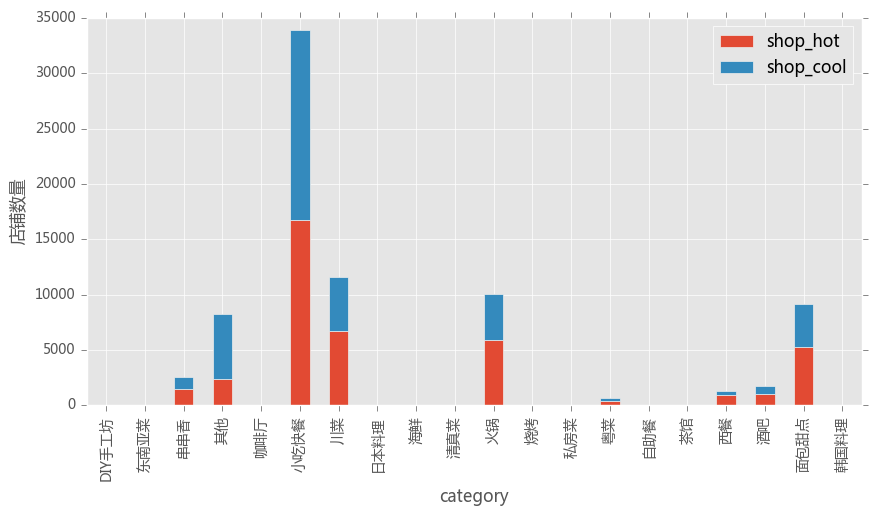

In [59]:
#分类分析:
#总体分类情况:
by_category[['shop_hot','shop_cool']].plot(kind='bar',stacked=True,figsize=(10,5)).set_ylabel('店铺数量')

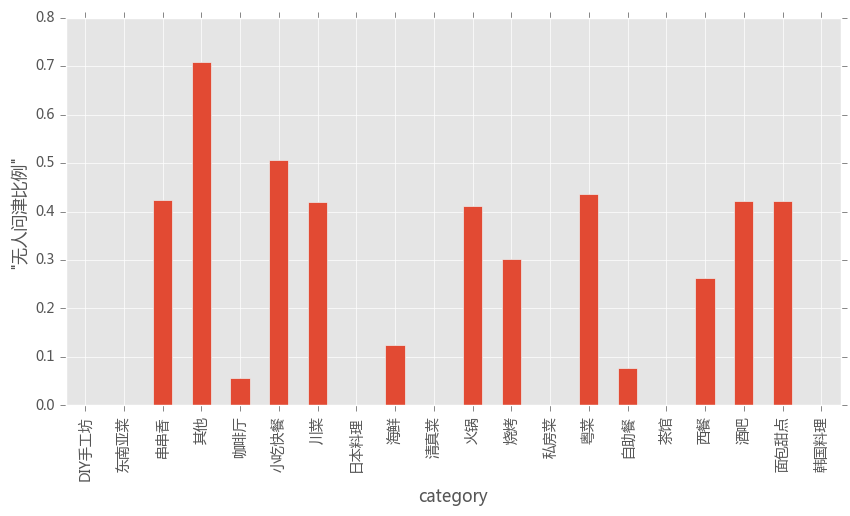

In [60]:
#各类店铺"无人问津"比例:
by_category.pct_cool.plot(kind='bar',figsize=(10,5)).set_ylabel('"无人问津比例"')

In [61]:
#"无人问津"店铺总体比例:
len(cool_shops)/len(data)

0.4832025038491633

In [62]:
#"无人问津"店铺总体比例达到48.32%,近一半店铺门可罗雀,可见餐饮业整体上已是一片红海.
#而咖啡厅,海鲜,自助餐相对"无人问津"比例较低,均在10%以内. 同时,DIY手工坊,东南亚菜,日本料理,清真菜,私房菜,茶馆及韩国料理均有人光顾,
#"无人问津"比例为0

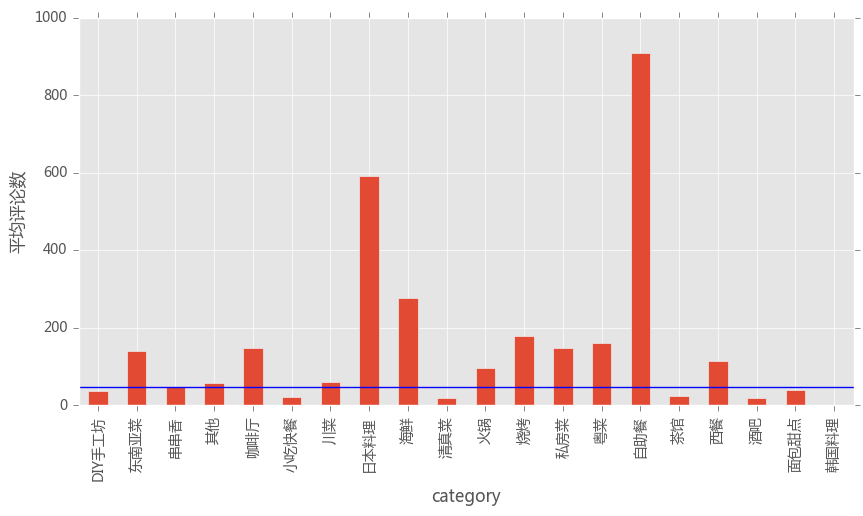

In [69]:
#各类店铺平均评论数情况:   ---说明:评论数研究均不包含"无人问津"餐厅
by_category.review_num.plot.bar(figsize=(10,5)).set_ylabel('平均评论数')
plt.axhline(y=47.3,color='b')

In [65]:
#总体平均评论数:
hot_shops.review_num.sum()/len(hot_shops)

47.321221001220998

In [70]:
#可见DIY手工坊,小吃快餐,清真菜,茶馆,酒吧及韩国料理评论数低于平均水平.
#而日本料理,海鲜及自助餐评论人数遥遥领先,对比这3类"无人问津"比例,日本料理为0,海鲜为12.5%,自助餐为7.7%,可以看出日本料理和自助餐在成都
#有较好的热度和空间.

In [73]:
#评价分析:
review_data=data[(data.mean_price>0)&(data.taste>0)&(data.env>0)&(data.serve>0)]
len(review_data)

19860

In [75]:
#评价的相关系数分析(总体):
review_data[['mean_price','taste','env','serve']].corr()

,mean_price,taste,env,serve
mean_price,1.000000,0.221605,0.311516,0.244953
taste,0.221605,1.000000,0.839824,0.895437
env,0.311516,0.839824,1.000000,0.906204
serve,0.244953,0.895437,0.906204,1.000000


In [76]:
#人均消费与味道,服务的相关系数均低于0.3,与环境的相关系数为0.31,可以得出结论:人均消费的高低与味道,环境和服务的好坏不相关.
#不可思议的结论...
#而味道与环境和服务的相关系数均达到了0.8以上,可见味道和环境及服务高度相关.味道不错的餐厅环境和服务也相对较好,而环境和服务相对较好的餐厅
#味道也不差...似乎..味道好坏和消费者的心情是高度相关的~环境好,服务好,消费者对味道反而就不那么敏感了么~

In [79]:
#再来看看成都人更加亲睐什么口味的菜吧~
grouped=review_data[['shop','category','mean_price','taste','env','serve']].groupby('category')
func={'shop':'count','mean_price':'mean','taste':'mean','env':'mean','serve':'mean'}
review_by_category=grouped.agg(func)
review_by_category

,env,taste,shop,serve,mean_price
category,,,,,
东南亚菜,7.900000,7.850000,2,8.000000,90.000000
串串香,7.250495,7.406337,1010,7.366832,42.190099
其他,7.334167,7.330357,840,7.316071,45.769048
咖啡厅,7.800000,7.400000,30,7.556667,46.466667
小吃快餐,7.047568,7.148299,6847,7.092654,20.496860
川菜,7.200196,7.231992,3579,7.165270,52.416038
日本料理,7.440000,7.300000,5,7.380000,47.000000
海鲜,7.600000,7.691667,12,7.541667,81.250000
清真菜,7.100000,7.300000,1,7.000000,17.000000


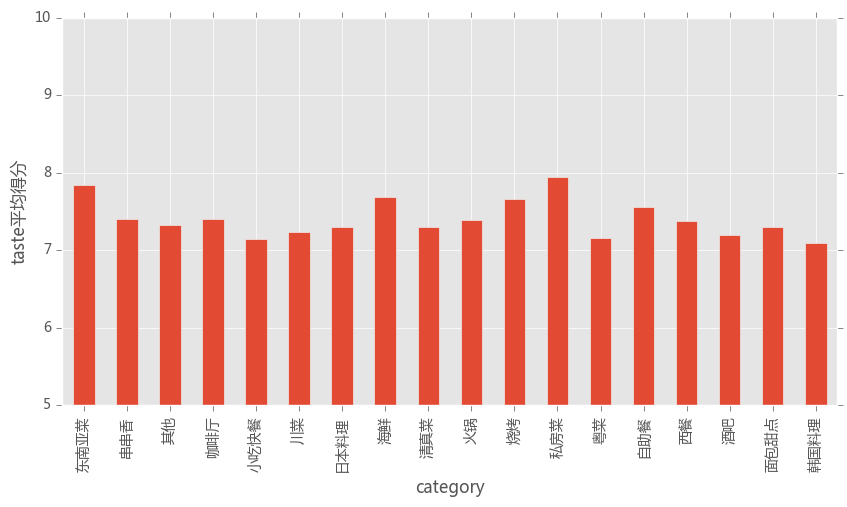

In [111]:
review_by_category.taste.plot(kind='bar',ylim=(5,10),figsize=(10,5)).set_ylabel('taste平均得分')

In [85]:
#呀,简直不分伯仲,看来成都人真是吃货啊,各种不嫌弃~
#当然,我们也能看出,东南亚菜和私房菜还是稍微有些优势的哦~

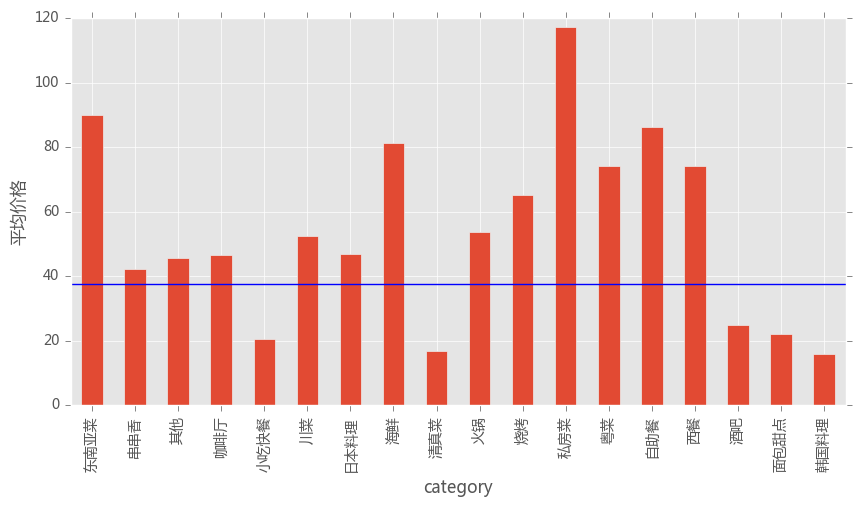

In [112]:
#再来看看价格:
review_by_category.mean_price.plot(kind='bar',figsize=(10,5)).set_ylabel('平均价格')
plt.axhline(y=review_data.mean_price.sum()/len(review_data),color='b')

In [114]:
#什么鬼!又是东南亚菜和私房菜!这不是成正相关了么...等等,那我们的总体相关系数只能针对总体而言了..在分类方面还有秘密么?
#酒吧混得真是有点尴尬...嗯,韩国料理,我很满意..
corr_by_category=review_data[['category','mean_price','taste']].groupby('category').corr()['taste'].dropna()
corr_by_category=DataFrame(corr_by_category.xs('mean_price',level=1))
corr_by_category.columns=['corr']
corr_by_category

,corr
category,
东南亚菜,1.000000
串串香,0.240668
其他,0.231650
咖啡厅,-0.126046
小吃快餐,0.223359
川菜,0.184124
日本料理,0.543768
海鲜,0.544294
火锅,0.394431


In [116]:
#卧槽,还有负相关..
#整体来看,还是呈现不相关状态..东南亚菜店铺只有2家,应该是巧合,而私房菜是普遍价格偏高而味道偏好么...仅此而已么....好难过..
#再看看:
review_data[review_data.category=='私房菜']

,ID,shop,area,addr,category,review_num,mean_price,taste,env,serve
538,539,88青年空间蔬食生活馆(春熙路店),兰桂坊,镗钯街88号,私房菜,547,86,7.7,9.1,8.4
14628,14632,南风私房菜,建设路,建设路万科·金域蓝湾小区7栋3301,私房菜,65,103,6.9,7.3,7.2
14629,14633,南风私房菜(双楠店),高升桥,高升桥路北街16号罗浮世家2期9栋1单元1003室,私房菜,14,106,7.0,7.0,7.1
24854,24858,子墨味语私房菜,九眼桥,东大街芷泉段88号时代尊邸6幢3304,私房菜,347,173,7.9,8.4,8.2
36127,36131,斑布·松露,大慈寺,大慈寺3号朗御1单元3704,私房菜,321,205,8.6,8.7,9.0
36791,36795,无同(望江店),九眼桥,九眼桥望江路1号中海格林威治城一层,私房菜,292,106,7.6,9.1,7.9
48781,48785,王小姐的菜菜,四川师大,锦江大道889号合能锦城永辉超市一楼,私房菜,23,40,7.6,7.6,7.7
54263,54267,红墙记忆新派川菜,骡马市,长顺下街红墙巷19号附7号,私房菜,138,88,8.3,8.4,8.5
61364,61368,莯私房菜,宽窄巷子,泡桐树街12号,私房菜,80,113,7.9,8.0,8.1
63650,63654,蜂房f.fan秘社(高空餐饮酒吧),春熙路,大慈寺3号朗御2单元2906,私房菜,189,92,9.2,9.2,9.1


In [117]:
#结语:分析数据只有8万不到,而实际总量在14万多...继续修改爬虫吧...